In [1]:
import os
import pandas as pd
import ast
import numpy as np


In [2]:
folder_path = r'C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\log_map\Mistralton City'
files = os.listdir(folder_path)

In [3]:
data_frames = []  # 存储每个文件的 DataFrame

for file in files:
    file_path = os.path.join(folder_path, file)
    if file.endswith('.csv'):  # 假设文件是以.csv结尾的
        df = pd.read_csv(file_path, delimiter=';')  # 读取文件为 DataFrame
        data_frames.append(df)  # 将 DataFrame 添加到列表中

# 合并所有 DataFrame
merged_df = pd.concat(data_frames, ignore_index=True)

In [ ]:
merged_df

In [4]:
df=merged_df.copy()

In [5]:
# 将字符串转换为字典格式
df['memory_coords'] = df['memory_coords'].apply(ast.literal_eval)
df['game_status'] = df['game_status'].apply(ast.literal_eval)

# 提取 "x_coords"、"y_coords" 和 "map_number" 到新列
df['x_coords'] = df['memory_coords'].apply(lambda x: x.get('x_coords'))
df['y_coords'] = df['memory_coords'].apply(lambda x: x.get('y_coords'))
df['map_number'] = df['memory_coords'].apply(lambda x: x.get('map_number'))
df['face_dir']=df['memory_coords'].apply(lambda x: x.get('face_dir'))
df['transport']=df['memory_coords'].apply(lambda x: x.get('transport'))



In [6]:
f = df.drop(['memory_coords'], axis=1)
df = df.drop(['game_status', 'enemy_status', 'state_dict', 'memory_battle_status','face_dir','transport'], axis=1)


In [7]:
df = df.drop(['timestamp', 'memory_coords'], axis=1)

In [8]:
df.describe()

,x_coords,y_coords
count,33436.000000,33436.000000
mean,45.712077,1853.365923
std,46.705459,10543.848373
min,0.000000,0.000000
25%,11.000000,13.000000
50%,16.000000,21.000000
75%,108.000000,262.000000
max,121.000000,65535.000000


In [9]:
# 拆分 "map_number" 列
df[['map_num_1', 'map_num_2', 'map_num_3']] = pd.DataFrame(df['map_number'].tolist())

# 删除原始的 "map_number" 列
#df = df.drop(['map_number'], axis=1)


In [10]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,x_coords,y_coords,map_number,map_num_1,map_num_2,map_num_3
0,108,305,"(2, 0, 107)",2,0,107
1,109,305,"(2, 0, 107)",2,0,107
2,110,305,"(2, 0, 107)",2,0,107
3,111,305,"(2, 0, 107)",2,0,107
4,111,304,"(2, 0, 107)",2,0,107
...,...,...,...,...,...,...
1113,104,263,"(2, 1, 81)",2,1,81
1114,106,270,"(2, 1, 81)",2,1,81
1115,105,270,"(2, 1, 81)",2,1,81
1116,106,261,"(2, 1, 81)",2,1,81


In [11]:
unique_values = df['map_number'].unique()
print(unique_values)

[(2, 0, 107) (2, 1, 81) (2, 1, 82) (2, 1, 83) (2, 0, 109) (2, 1, 84)
 (2, 1, 85) (2, 1, 86)]


In [12]:
df = df.drop(df[df['map_number'] == (2, 0, 109)].index) # 不要医院地图

In [13]:
# desired_values = [(2, 0, 107), (2, 1, 81)]#只要大地图的
# df = df[df['map_number'].isin(desired_values)]
#df = df[~df['map_number'].isin([(2, 0, 107), (2, 1, 81)])]#只要龙塔的
# 只要龙塔1层和2曾
target_map_numbers = [(2, 1, 82), (2, 1, 83),(2,1,81),(2, 0, 107)]  # 目标 map_number 列表

df = df[df['map_number'].isin(target_map_numbers)].copy()

In [14]:
df = df.drop(df[df['y_coords'] == 65535.000000].index)

In [15]:
# 计算数值列的统计信息
numeric_cols = ['x_coords', 'y_coords', 'map_num_1', 'map_num_2', 'map_num_3']
statistics = df[numeric_cols].describe()
print(statistics)


         x_coords    y_coords  map_num_1   map_num_2   map_num_3
count  809.000000  809.000000      809.0  809.000000  809.000000
mean    83.169345  202.579728        2.0    0.729295   88.496910
std     43.572828  119.214192        0.0    0.444599   11.303763
min      0.000000    0.000000        2.0    0.000000   81.000000
25%     20.000000   24.000000        2.0    0.000000   81.000000
50%    106.000000  259.000000        2.0    1.000000   82.000000
75%    113.000000  291.000000        2.0    1.000000  107.000000
max    121.000000  311.000000        2.0    1.000000  107.000000


In [16]:
outliers = df[df['y_coords'] == 65535.000000]

# 显示异常值行
print(outliers)
len(outliers)

Empty DataFrame
Columns: [x_coords, y_coords, map_number, map_num_1, map_num_2, map_num_3]
Index: []


0

In [17]:
def transform_coords(df):
    # 创建条件变量
    condition1 = df['y_coords'] <= 10
    condition2 = df['map_number'] == (2, 1, 82)
    condition3 = df['map_number'] == (2, 1, 83)

    # 将原始坐标复制到新的坐标列
    df['new_x'] = df['x_coords']
    df['new_y'] = df['y_coords']

    # 对满足条件的行进行转换
    df.loc[condition1 & condition2, 'new_x'] = 13 - df.loc[condition1 & condition2, 'x_coords']
    df.loc[condition1 & condition2, 'new_y'] = 25 - df.loc[condition1 & condition2, 'y_coords']

    df.loc[condition3, 'new_x'] = df.loc[condition3, 'x_coords'] - 26
    df.loc[condition3, 'new_y'] = df.loc[condition3, 'y_coords'] + 2

    return df

df2 = transform_coords(df)


In [18]:
new_df = df2[['x_coords', 'y_coords', 'map_number']].reset_index(drop=True)
new_df


,x_coords,y_coords,map_number
0,108,305,"(2, 0, 107)"
1,109,305,"(2, 0, 107)"
2,110,305,"(2, 0, 107)"
3,111,305,"(2, 0, 107)"
4,111,304,"(2, 0, 107)"
...,...,...,...
804,104,263,"(2, 1, 81)"
805,106,270,"(2, 1, 81)"
806,105,270,"(2, 1, 81)"
807,106,261,"(2, 1, 81)"


In [ ]:
pd.set_option('display.max_rows', None)
print(new_df)

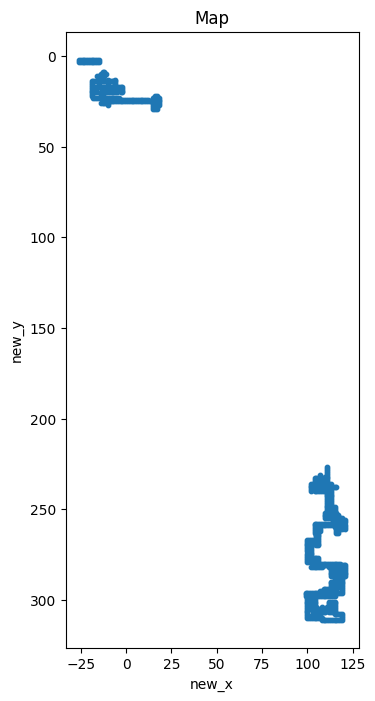

In [19]:

import matplotlib.pyplot as plt

# 创建图形对象和坐标轴
fig, ax = plt.subplots(figsize=(8, 8))  # 调整图形大小

# 绘制散点图，调整坐标点大小
ax.scatter(df2['new_x'], df2['new_y'], s=10)  # 调整坐标点大小

# 反转 y 轴
ax.invert_yaxis()

# 设置坐标轴标签
ax.set_xlabel('new_x')
ax.set_ylabel('new_y')

# 设置标题
ax.set_title('Map')

# 调整坐标轴比例相同
ax.set_aspect('equal')

# 显示图形
plt.show()


In [25]:
row_values = df2[(df2['x_coords'] == 11) & (df2['y_coords'] == 15)].values

if len(row_values) > 0:
    print(row_values)
else:
    print("找不到符合条件的行")


[[11 15 (2, 1, 83) 2 1 83 -15 17]]


In [ ]:
df3=df[df['map_number'] == ((2, 1, 83))]
fig, ax = plt.subplots(figsize=(8, 8))  # 调整图形大小

# 绘制散点图，调整坐标点大小
ax.scatter(df3['new_x'], df3['new_y'], s=10)  # 调整坐标点大小

# 反转 y 轴
ax.invert_yaxis()

# 设置坐标轴标签
ax.set_xlabel('new_x')
ax.set_ylabel('new_y')

# 设置标题
ax.set_title('Map')

# 调整坐标轴比例相同
ax.set_aspect('equal')

# 显示图形
plt.show()

In [ ]:
df3=df[df['map_number'] == ((2, 1, 84))]
fig, ax = plt.subplots(figsize=(8, 8))  # 调整图形大小

# 绘制散点图，调整坐标点大小
ax.scatter(df3['new_x'], df3['new_y'], s=10)  # 调整坐标点大小

# 反转 y 轴
ax.invert_yaxis()

# 设置坐标轴标签
ax.set_xlabel('new_x')
ax.set_ylabel('new_y')

# 设置标题
ax.set_title('Map')

# 调整坐标轴比例相同
ax.set_aspect('equal')

# 显示图形
plt.show()

In [ ]:
df3=df[df['map_number'] == ((2, 1, 85))]
fig, ax = plt.subplots(figsize=(8, 8))  # 调整图形大小

# 绘制散点图，调整坐标点大小
ax.scatter(df3['new_x'], df3['new_y'], s=10)  # 调整坐标点大小

# 反转 y 轴
ax.invert_yaxis()

# 设置坐标轴标签
ax.set_xlabel('new_x')
ax.set_ylabel('new_y')

# 设置标题
ax.set_title('Map')

# 调整坐标轴比例相同
ax.set_aspect('equal')

# 显示图形
plt.show()

In [ ]:
df3=df[df['map_number'] == ((2, 1, 86))]
fig, ax = plt.subplots(figsize=(8, 8))  # 调整图形大小

# 绘制散点图，调整坐标点大小
ax.scatter(df3['new_x'], df3['new_y'], s=10)  # 调整坐标点大小

# 反转 y 轴
ax.invert_yaxis()

# 设置坐标轴标签
ax.set_xlabel('new_x')
ax.set_ylabel('new_y')

# 设置标题
ax.set_title('Map')

# 调整坐标轴比例相同
ax.set_aspect('equal')

# 显示图形
plt.show()

In [26]:
# 将坐标点四舍五入到最近的整数
df = df.round(0)

# 创建一个空的DataFrame，它的行和列分别代表y和x的值
grid_df = pd.DataFrame(index=np.arange(int(df['new_y'].min()), int(df['new_y'].max()) + 1),
                       columns=np.arange(int(df['new_x'].min()), int(df['new_x'].max()) + 1))

# 将存在的坐标点填充为1
for _, row in df.iterrows():
    # 根据new_y的值选择填充值
    if row['new_y'] >= 200:
        fill_value = 4
    else:
        fill_value = 1

    grid_df.at[int(row['new_y']), int(row['new_x'])] = fill_value

# 反转y轴
# grid_df = grid_df.iloc[::-1]

# 导出到Excel
grid_df.to_excel("Mistralton City2 coordinates.xlsx")

In [34]:
#df = pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\FALLARBOR TOWN coordinates.xlsx", index_col=0)
#df = pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\SOOTOPOLIS_CITY coordinates.xlsx", index_col=0)
#df=pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\BATTLE FRONTIER coordinates.xlsx", index_col=0)
df = pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\Mistralton City coordinates.xlsx", index_col=0)
# 先重置索引，这样行标签就变成一列
df = df.reset_index()
df




,index,-26,-25,-24,-23,-22,-21,-20,-19,-18,...,112,113,114,115,116,117,118,119,120,121
0,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
306,308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,NaN,NaN
307,309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
308,310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


In [35]:
# 使用 melt，这会把所有列都转成两列，一列是原来的列名（变量），一列是对应的值
df_melted = df.melt(id_vars='index', var_name='x_coords', value_name='mark')
df_melted

,index,x_coords,mark
0,2,-26,1.0
1,3,-26,1.0
2,4,-26,NaN
3,5,-26,NaN
4,6,-26,NaN
...,...,...,...
45875,307,121,NaN
45876,308,121,NaN
45877,309,121,NaN
45878,310,121,NaN


In [36]:
# 修改列名
df_melted.rename(columns={'index': 'y_coords'}, inplace=True)
df_melted


,y_coords,x_coords,mark
0,2,-26,1.0
1,3,-26,1.0
2,4,-26,NaN
3,5,-26,NaN
4,6,-26,NaN
...,...,...,...
45875,307,121,NaN
45876,308,121,NaN
45877,309,121,NaN
45878,310,121,NaN


In [37]:
# 过滤掉 mark 列为 NaN 的行
df_melted = df_melted.dropna(subset=['mark'])
df_melted

,y_coords,x_coords,mark
0,2,-26,1.0
1,3,-26,1.0
310,2,-25,1.0
311,3,-25,1.0
620,2,-24,1.0
...,...,...,...
45851,283,121,4.0
45852,284,121,4.0
45853,285,121,4.0
45854,286,121,4.0


In [38]:
# 把值为PC_IN的单元格的值改成112
df_melted.loc[df_melted['mark'] == 'pc_in', 'mark'] = 112

df_melted.loc[df_melted['mark'] == 'farming', 'mark'] = 66
# 所有float类型的值转成int
df_melted = df_melted.astype({'mark': 'int'})

df_melted.reset_index(drop=True, inplace=True)

# 输出查看结果
print(df_melted)

     y_coords x_coords  mark
0           2      -26     1
1           3      -26     1
2           2      -25     1
3           3      -25     1
4           2      -24     1
..        ...      ...   ...
762       283      121     4
763       284      121     4
764       285      121     4
765       286      121     4
766       287      121     4

[767 rows x 3 columns]


In [39]:
df_melted.to_csv(r'C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\Mistralton_City_coords_tracking.csv')